In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style= 'whitegrid', font_scale=1.3)

In [20]:
data = pd.read_csv('errorsBasic.txt', header= None, sep= ',')
h = [10 ** i for i in range(0, -(len(data.columns) - 1), -1)]
N = [3, 4, 5]
x_data = np.log(h)

FileNotFoundError: [Errno 2] No such file or directory: 'errors.txt'

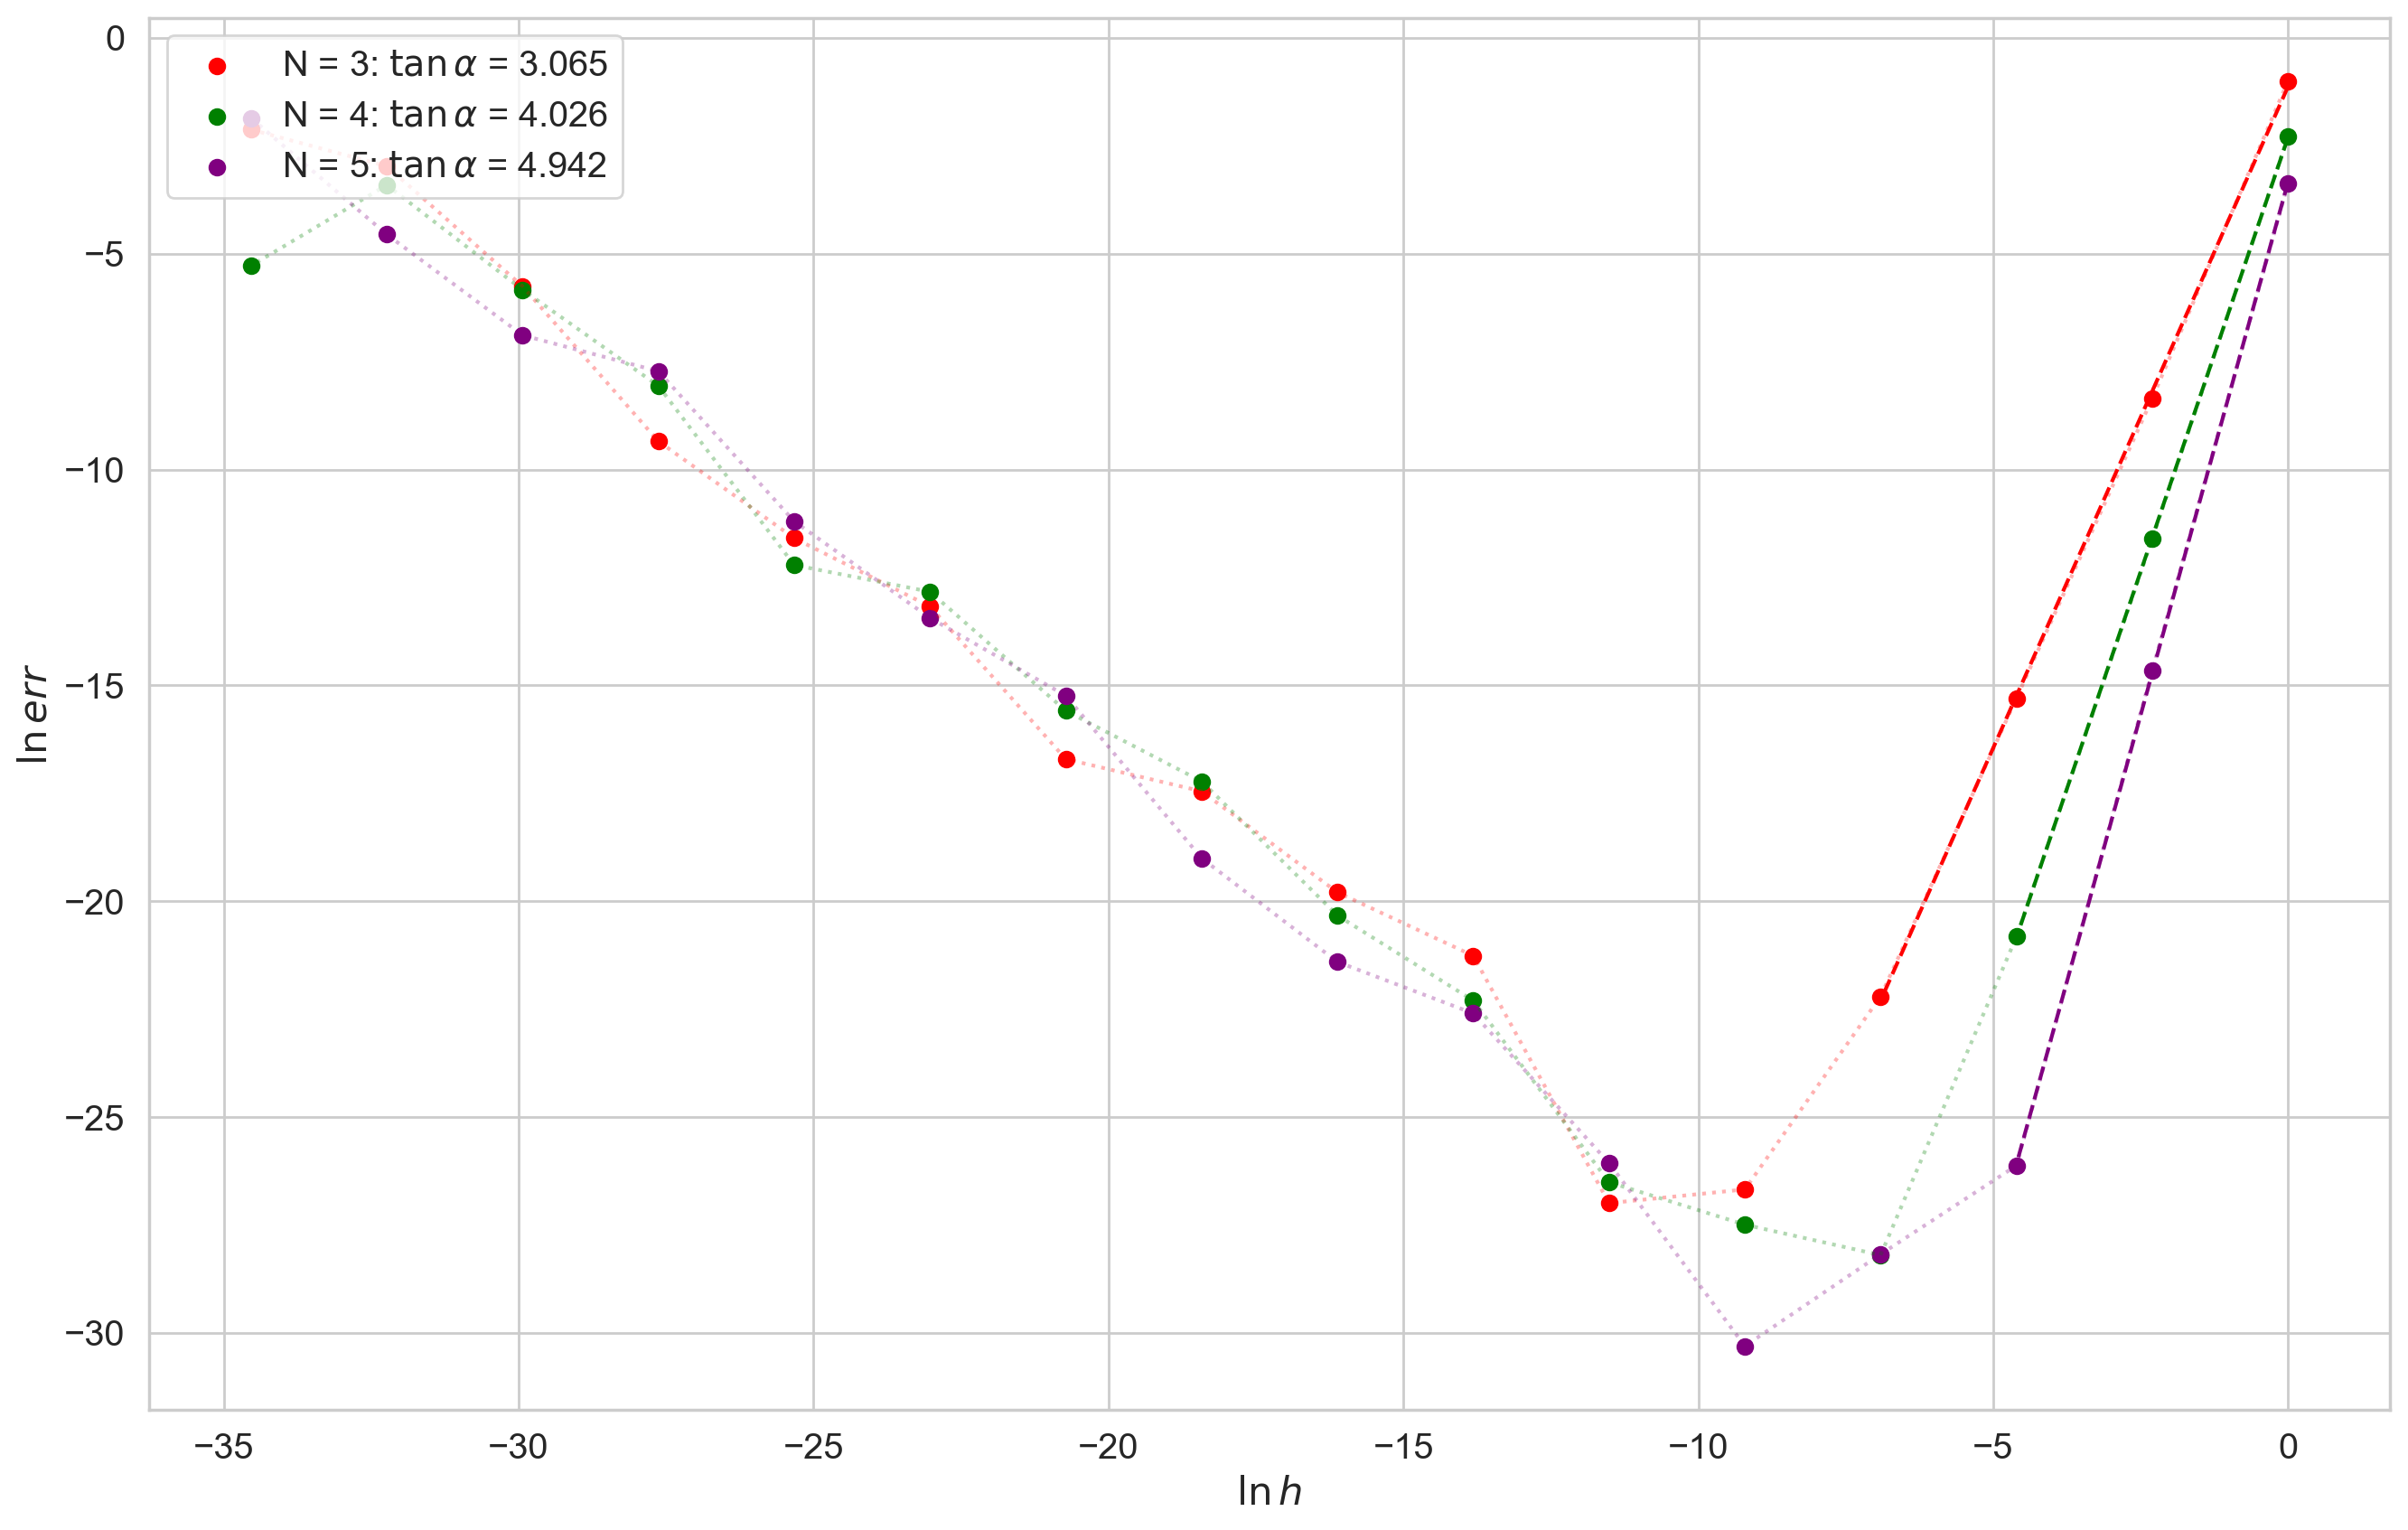

In [ ]:
y_data3 = np.log(data.iloc[0, :-1])
y_data4 = np.log(data.iloc[1, :-1])
y_data5 = np.log(data.iloc[2, :-1])

p3 = np.polyfit(x_data[:4], y_data3[:4], 1)
y_3 = np.polyval(p3, x_data[:4])
k3 = p3[0]

p4 = np.polyfit(x_data[:3], y_data4[:3], 1)
y_4 = np.polyval(p4, x_data[:3])
k4 = p4[0]

p5 = np.polyfit(x_data[:3], y_data5[:3], 1)
y_5 = np.polyval(p5, x_data[:3])
k5 = p5[0]


plt.figure(figsize= (16,10), dpi= 200)

plt.scatter(x_data, y_data3, c = 'red', label = f'N = 3: $\\tan \\alpha$ = {k3:.3f}')
plt.plot(x_data, y_data3, c = 'red', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:4], y_3, c = 'red', linestyle = '--')

plt.scatter(x_data, y_data4, c = 'green', label = f'N = 4: $\\tan \\alpha$ = {k4:.3f}')
plt.plot(x_data, y_data4, c = 'green', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:3], y_4, c = 'green', linestyle = '--')

plt.scatter(x_data, y_data5, c = 'purple', label = f'N = 5: $\\tan \\alpha$ = {k5:.3f}')
plt.plot(x_data, y_data5, c = 'purple', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:3], y_5, c = 'purple', linestyle = '--')

plt.legend(loc = 'upper left')
plt.xlabel('$\ln h$')
plt.ylabel('$\ln err$')
plt.savefig(f'plot345NBasic')

In [ ]:
data = pd.read_csv('errorsAdvanced.txt', header= None, sep= ',')
h = [10 ** i for i in range(0, -(len(data.columns) - 1), -1)]
N = [3, 4, 5]
x_data = np.log(h)

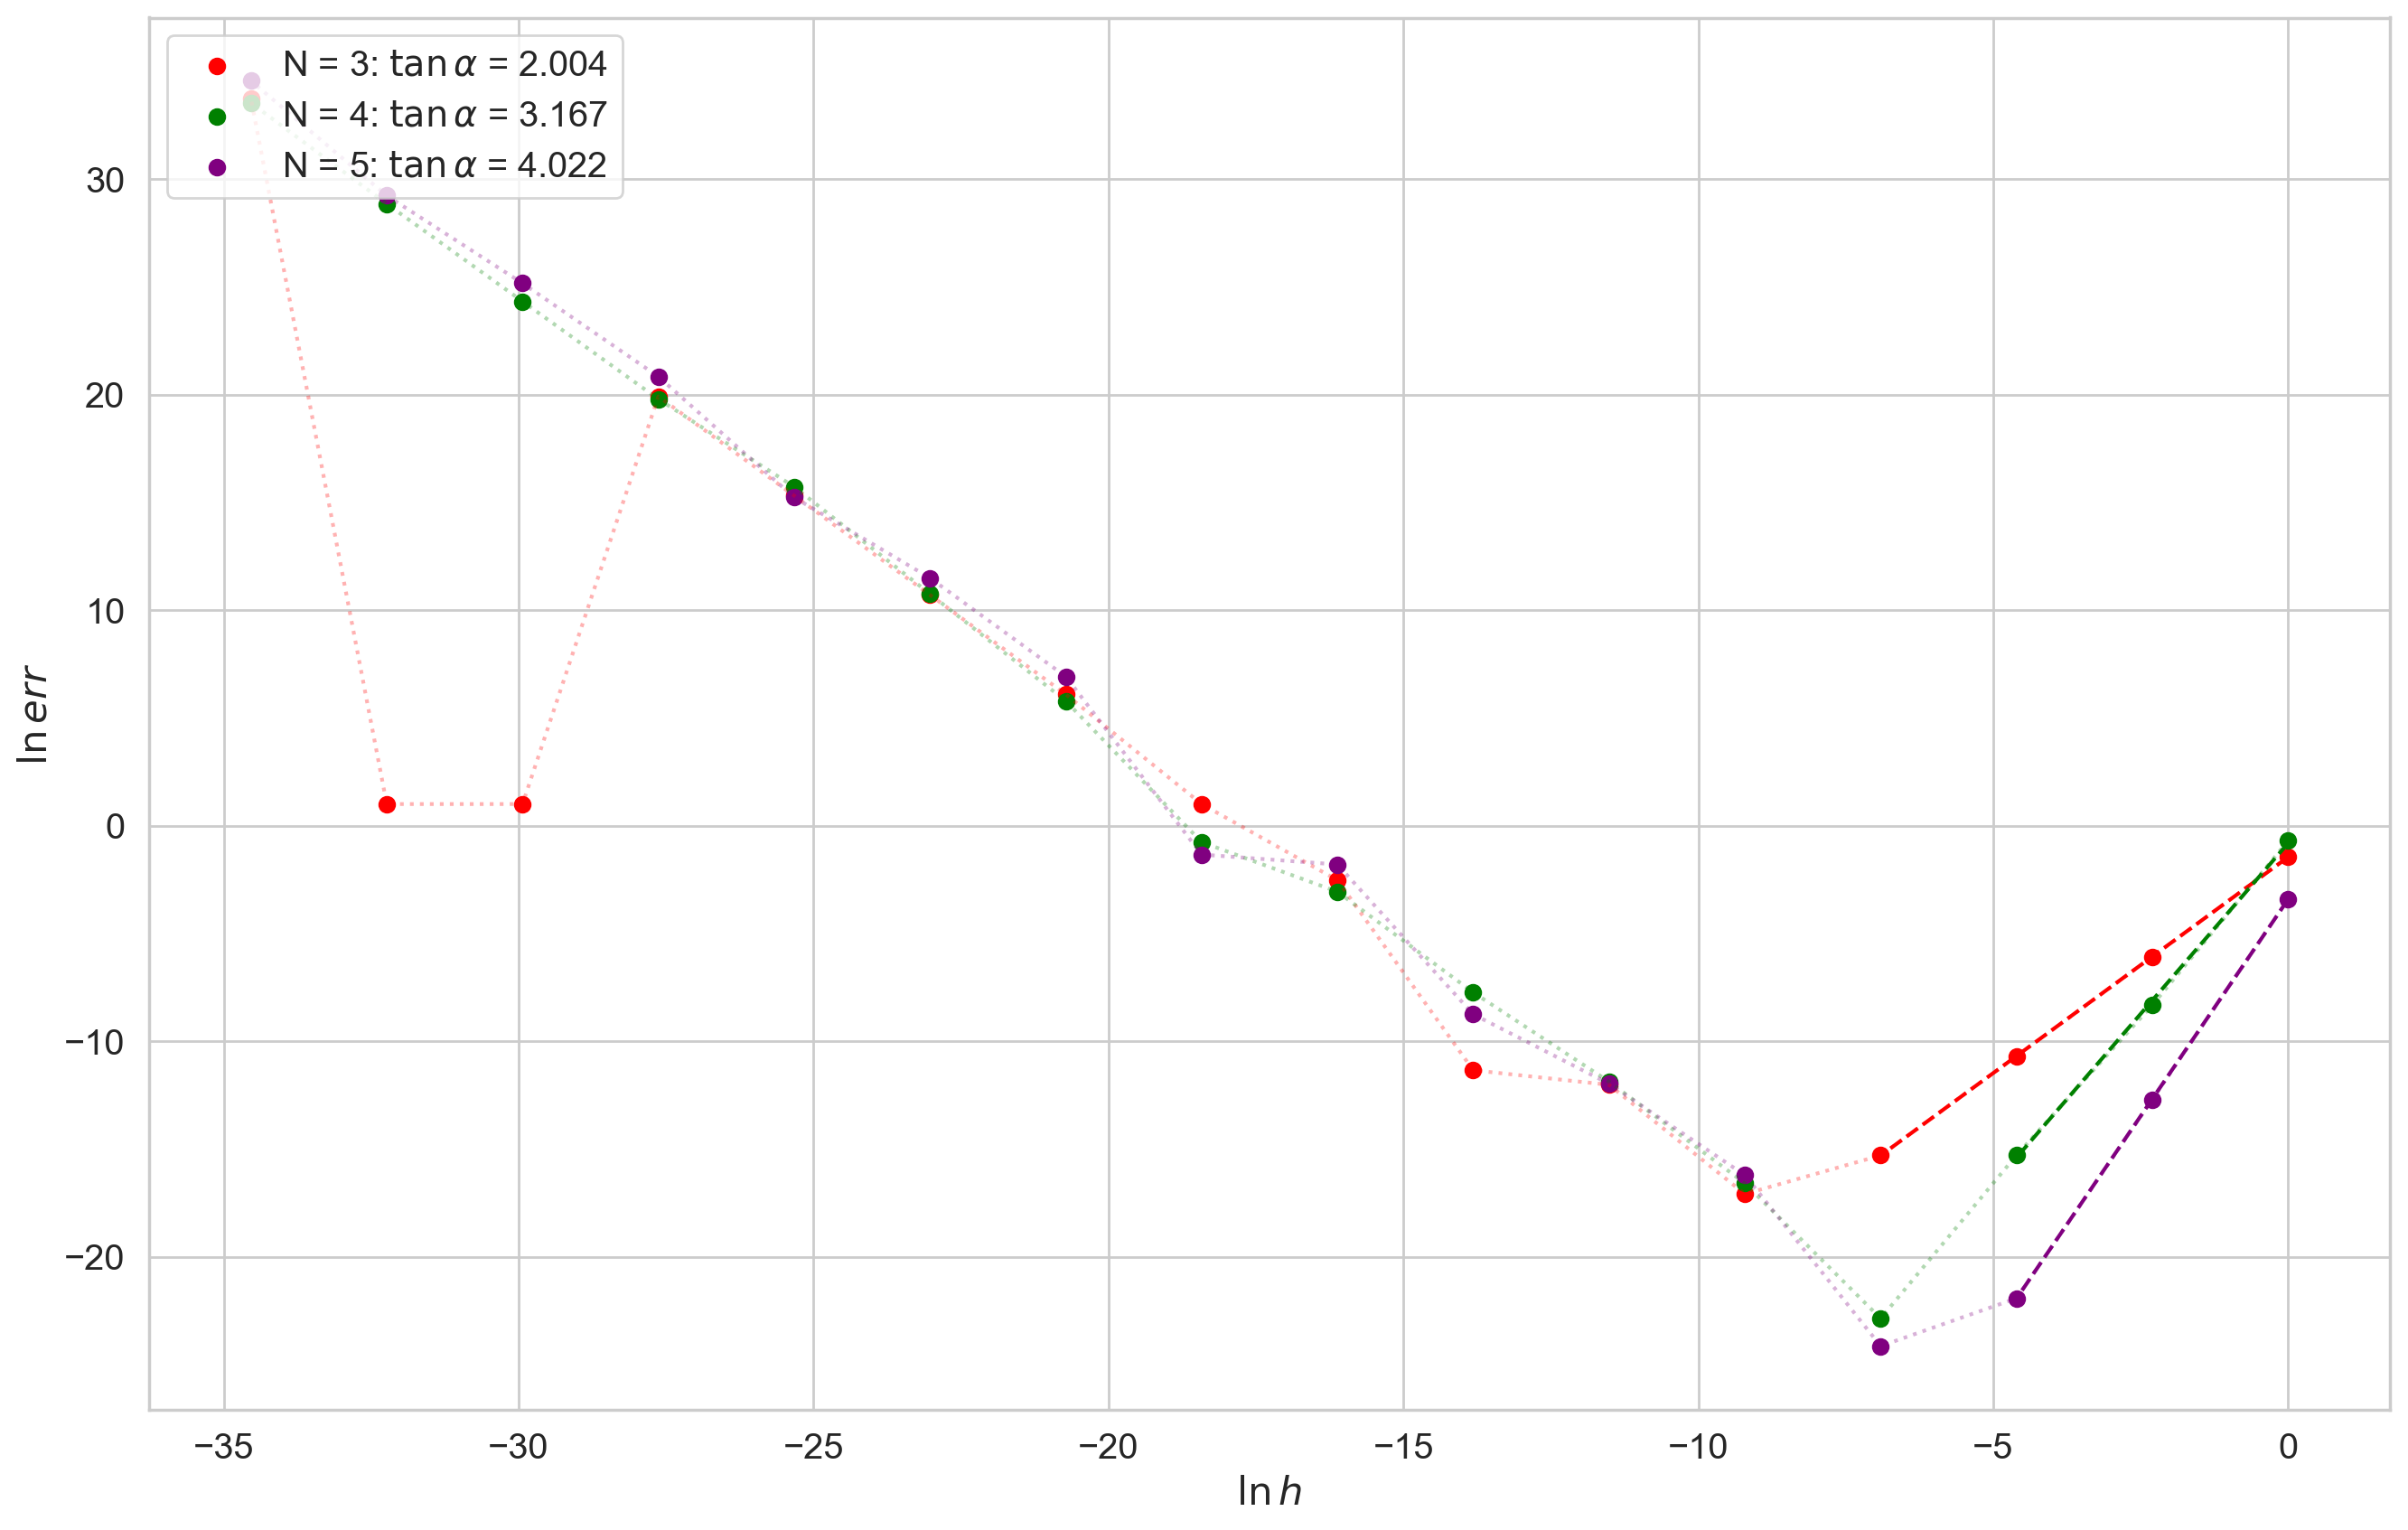

In [ ]:
y_data3 = np.log(data.iloc[0, :-1])
y_data4 = np.log(data.iloc[1, :-1])
y_data5 = np.log(data.iloc[2, :-1])

p3 = np.polyfit(x_data[:4], y_data3[:4], 1)
y_3 = np.polyval(p3, x_data[:4])
k3 = p3[0]

p4 = np.polyfit(x_data[:3], y_data4[:3], 1)
y_4 = np.polyval(p4, x_data[:3])
k4 = p4[0]

p5 = np.polyfit(x_data[:3], y_data5[:3], 1)
y_5 = np.polyval(p5, x_data[:3])
k5 = p5[0]


plt.figure(figsize= (16,10), dpi= 200)

plt.scatter(x_data, y_data3, c = 'red', label = f'N = 3: $\\tan \\alpha$ = {k3:.3f}')
plt.plot(x_data, y_data3, c = 'red', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:4], y_3, c = 'red', linestyle = '--')

plt.scatter(x_data, y_data4, c = 'green', label = f'N = 4: $\\tan \\alpha$ = {k4:.3f}')
plt.plot(x_data, y_data4, c = 'green', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:3], y_4, c = 'green', linestyle = '--')

plt.scatter(x_data, y_data5, c = 'purple', label = f'N = 5: $\\tan \\alpha$ = {k5:.3f}')
plt.plot(x_data, y_data5, c = 'purple', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:3], y_5, c = 'purple', linestyle = '--')

plt.legend(loc = 'upper left')
plt.xlabel('$\ln h$')
plt.ylabel('$\ln err$')
plt.savefig(f'plot345NAdvanced')